In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller

In [109]:
df = pd.read_csv(r'C:\Clarenti\Data\Project\Py\Analytics\Personal\Analytics/datasets/ecommerce_sales_analysis.csv')
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [111]:
df.duplicated(subset=['product_id']).sum()

0

In [112]:
df.describe(include='all')

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
unique,NaN,1000,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Product_1,Books,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,NaN,NaN,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,NaN,NaN,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,NaN,NaN,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,NaN,NaN,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,NaN,NaN,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000


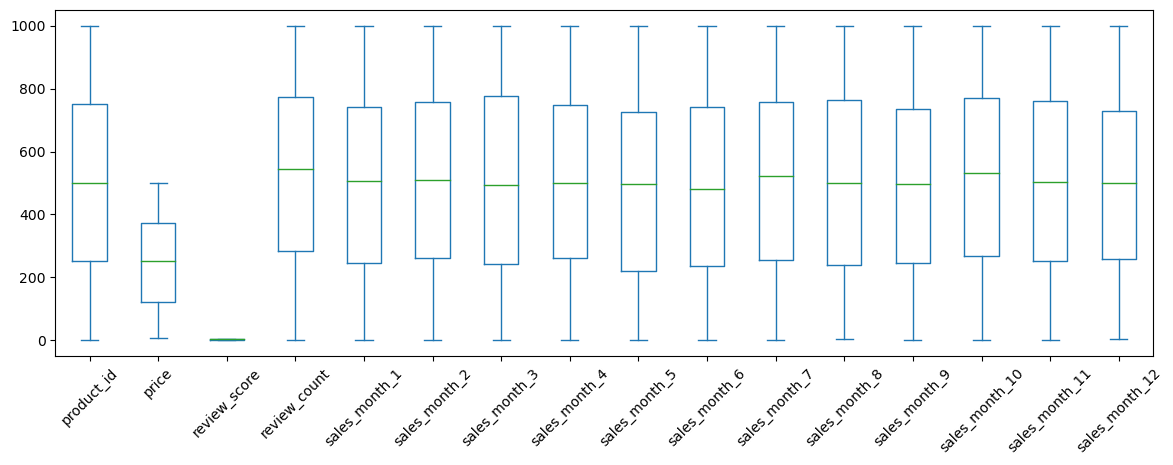

In [113]:
df.select_dtypes(include=['int64', 'float64']).plot(kind='box', figsize=(12, 4))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [114]:
sales = df.drop(columns=['product_id', 'product_name', 'price', 'review_score', 'review_count'], inplace=False)

In [115]:
sales.head()

,category,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,Clothing,479,449,92,784,604,904,446,603,807,252,695,306
1,Home & Kitchen,21,989,861,863,524,128,610,436,176,294,772,353
2,Toys,348,558,567,143,771,409,290,828,340,667,267,392
3,Toys,725,678,59,15,937,421,670,933,56,157,168,203
4,Books,682,451,649,301,620,293,411,258,854,548,770,257


In [116]:
sales_cols = [f'sales_month_{x}' for x in range(1, 13)]
sales = df.melt(id_vars=['category'], value_vars=sales_cols, var_name='month', value_name='sales')
sales['month'] = sales['month'].apply(lambda x: int(x.split('_')[-1]))
sales

,category,month,sales
0,Clothing,1,479
1,Home & Kitchen,1,21
2,Toys,1,348
3,Toys,1,725
4,Books,1,682
...,...,...,...
11995,Home & Kitchen,12,393
11996,Home & Kitchen,12,474
11997,Sports,12,654
11998,Sports,12,394


In [117]:
data = {}
for i in sales.category.unique():
    data[i] = sales[sales['category'] == i].groupby(['category','month'])['sales'].mean().reset_index()

In [118]:
data['Clothing']

,category,month,sales
0,Clothing,1,435.471429
1,Clothing,2,485.078571
2,Clothing,3,548.542857
3,Clothing,4,500.628571
4,Clothing,5,440.307143
5,Clothing,6,450.878571
6,Clothing,7,472.178571
7,Clothing,8,531.585714
8,Clothing,9,519.107143
9,Clothing,10,491.471429


Text(0.5, 1.0, 'Average Sales of Each Category')

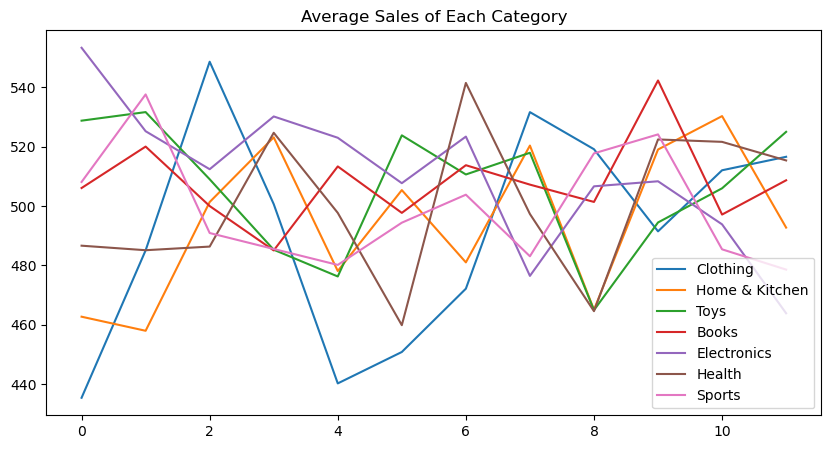

In [119]:
plt.figure(figsize=(10,5))
for i in data.keys():
    plt.plot(data[i]['sales'], label=f'{i}')
plt.legend()
plt.title('Average Sales of Each Category')

Stationary Check

In [120]:
lists = []
for i in data.keys():
    result = adfuller(data[i]['sales'])
    lists.append([i, result[1], 'Stationary' if result[1] < 0.05 else 'Non-Stationary'])

s = pd.DataFrame(lists, columns=['category', 'p_val', 'stationary_check'])
s

,category,p_val,stationary_check
0,Clothing,0.999005,Non-Stationary
1,Home & Kitchen,0.013520,Stationary
2,Toys,0.001890,Stationary
3,Books,0.000422,Stationary
4,Electronics,0.331751,Non-Stationary
5,Health,0.973343,Non-Stationary
6,Sports,0.006534,Stationary


In [121]:
lists_ = []
for name, p, check in s.values:
    if check == 'Non-Stationary':
        global result
        data[name] = data[name].assign(diff=data[name]['sales'].diff())
        data[name] = data[name].dropna()
        result = adfuller(data[name]['diff'])
    else:
        result = adfuller(data[name]['sales'])

    lists_.append([name, result[1], 'Stationary' if result[1] < 0.05 else 'Non-Stationary'])

pd.DataFrame(lists_, columns=['category', 'p_val', 'stationary_check'])

,category,p_val,stationary_check
0,Clothing,0.002202,Stationary
1,Home & Kitchen,0.013520,Stationary
2,Toys,0.001890,Stationary
3,Books,0.000422,Stationary
4,Electronics,0.000140,Stationary
5,Health,0.044723,Stationary
6,Sports,0.006534,Stationary


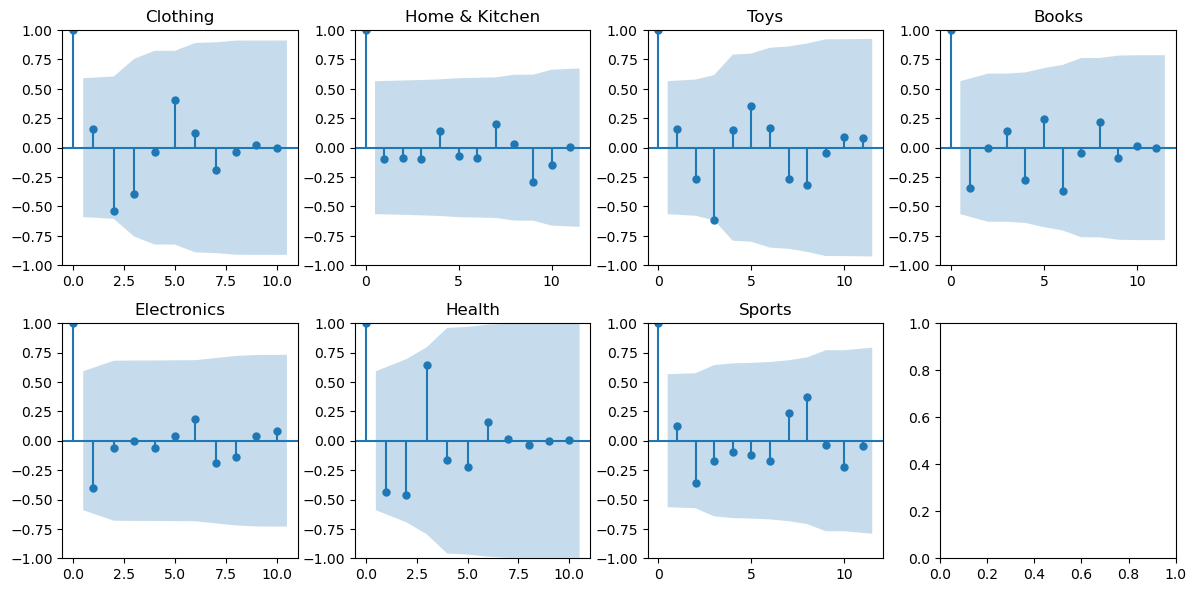

In [122]:
k, j = 0,0
fig, ax = plt.subplots(2,4, figsize=(12, 6))
for i in data.keys():
    if s[s.category == i]['stationary_check'].values[0] == 'Stationary':
        plot_acf(ax=ax[k, j], x=data[i]['sales'])
    else:
        plot_acf(ax=ax[k, j], x=data[i]['diff'])
    ax[k, j].set_title(i)
    if j == 3:
        k += 1
        j = 0
        continue
    j += 1

plt.tight_layout(pad=1)

### Model

#### Sarima

order(p,d,q) <br>
p (autoregressive order) = number of periods back in time for model to look at to make a prediction.<br>
d (diff order) = if you have non-stationary data, define this param. 

##### Forecast for Overall Data

In [123]:
df_sales = sales.groupby(['month'])['sales'].mean().reset_index()
df_sales

,month,sales
0,1,498.306
1,2,507.661
2,3,506.739
3,4,503.823
4,5,487.194
5,6,491.653
6,7,507.011
7,8,504.569
8,9,491.934
9,10,514.798


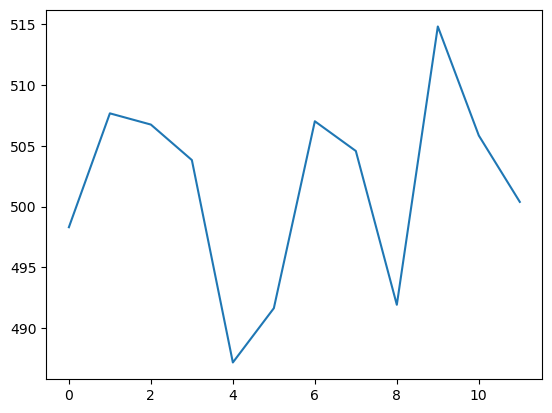

In [124]:
plt.plot(df_sales['sales'])

In [125]:
result = adfuller(df_sales['sales'])
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

Stationary


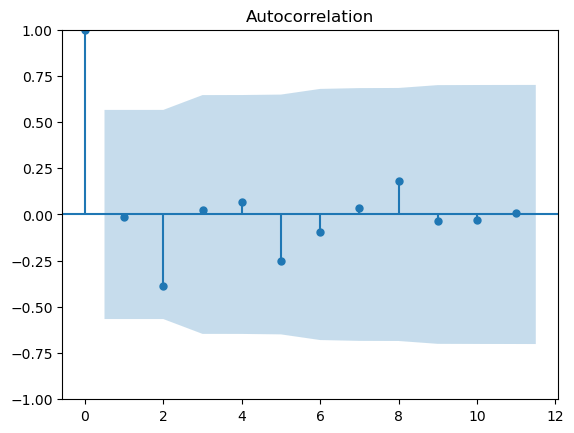

In [146]:
plot_acf(df_sales['sales']);

In [126]:
model = SARIMAX(df_sales['sales'], order=(1,0,1), seasonal_order=(0,1,1,12))

In [127]:
result = model.fit(disp=False)

In [128]:
period = 3 # predict for the next n-periods month
forecast = result.get_forecast(steps=period)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

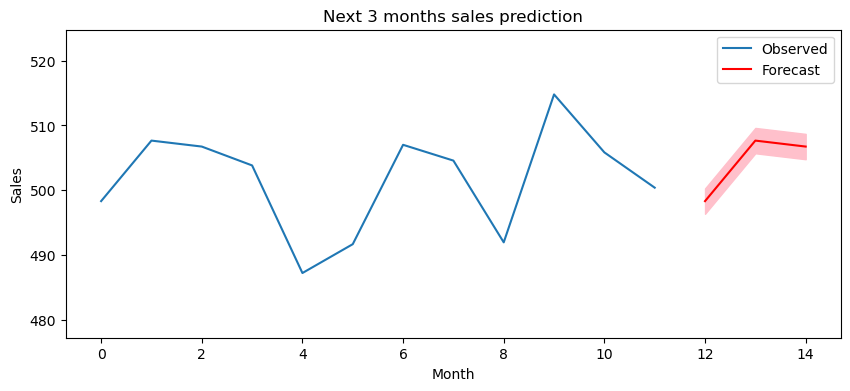

In [129]:
plt.figure(figsize=(10, 4)) 
plt.plot(df_sales['sales'], label='Observed') 
plt.plot(forecast_mean, label='Forecast', color='red') 
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink') 
plt.title('Next 3 months sales prediction')
plt.xlabel("Month") 
plt.ylabel("Sales") 
plt.legend() 
plt.ylim(df_sales['sales'].min()-10 if df_sales['sales'].min() < forecast_mean.min() else forecast_mean.min()-10, 
            forecast_mean.max()+10 if forecast_mean.max() > df_sales['sales'].max() else df_sales['sales'].max()+10)
plt.show()

##### Evaluate Model

In [130]:
df_sales

,month,sales
0,1,498.306
1,2,507.661
2,3,506.739
3,4,503.823
4,5,487.194
5,6,491.653
6,7,507.011
7,8,504.569
8,9,491.934
9,10,514.798


- I'll use SARIMA to predict test data and compare the result of sarima prediction to its actual data.

In [131]:
train = df_sales['sales'][df_sales.month < 9]
test = df_sales[df_sales.month > 8]['sales']

In [132]:
model = SARIMAX(train, order=(1,0,1), seasonal_order=(0,1,1,len(train)))

In [133]:
sarima = model.fit(disp=False)

In [134]:
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima.predict(start=start, end=end, dynamic=False)

Mean Absolute Error (MAE): 4.461749999999995
Mean Squared Error (MSE): 26.040980749999974
Root Mean Squared Error (RMSE): 5.103036424522166
R-squared (R²): 0.6230150604878069


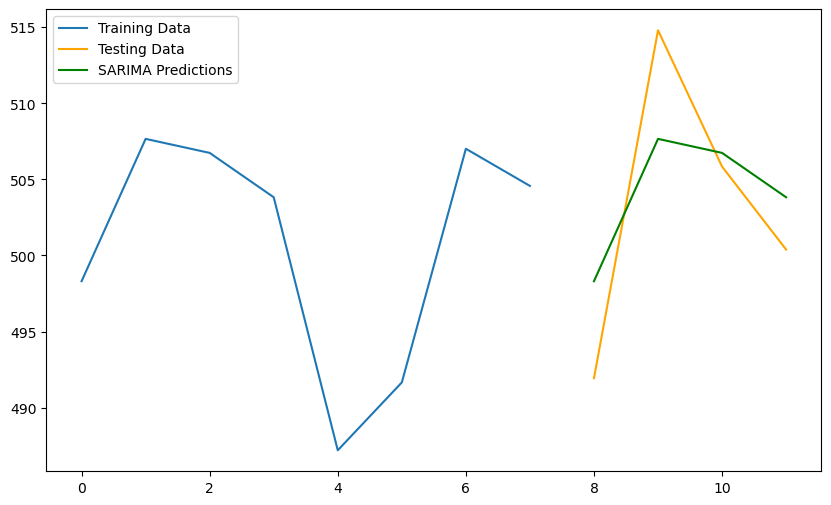

In [135]:
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data', color='orange')
plt.plot(predictions, label='SARIMA Predictions', color='green')
plt.legend()
plt.show()

In [136]:
pred = {
    'month': df_sales[df_sales.month > 8]['month'],
    'actual': test,
    'prediction': predictions,
}
t_err = pd.DataFrame(pred)
t_err['error'] = abs(t_err['actual'] - t_err['prediction'])
t_err

,month,actual,prediction,error
8,9,491.934,498.306,6.372
9,10,514.798,507.661,7.137
10,11,505.838,506.739,0.901
11,12,500.386,503.823,3.437


In [137]:
f'Persentase Error: {mae/t_err.actual.mean()}'

'Persentase Error: 0.008866065626869132'

##### Forecast of each category

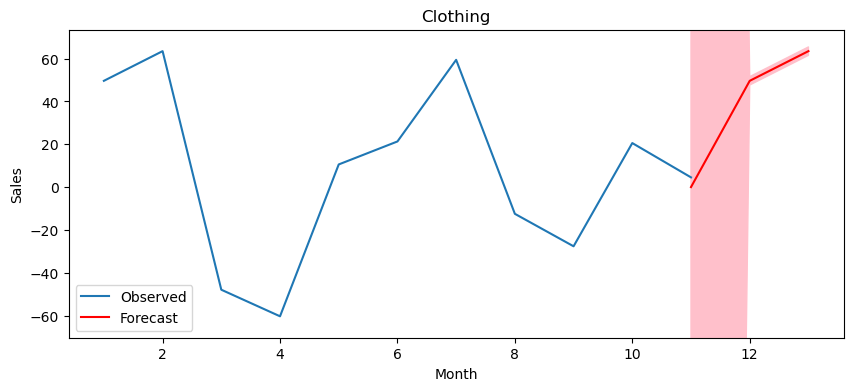

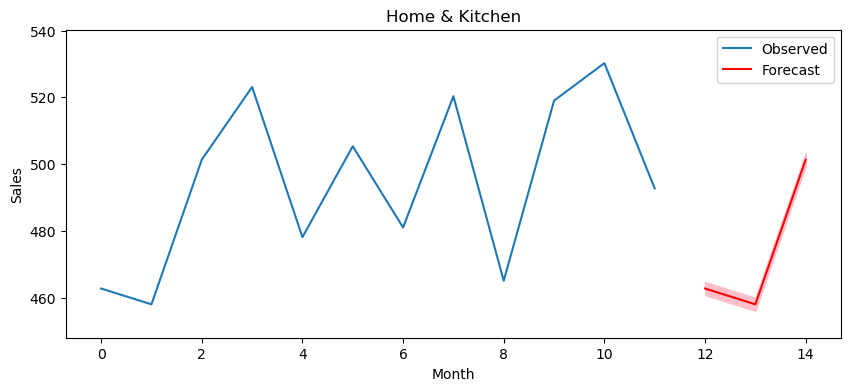

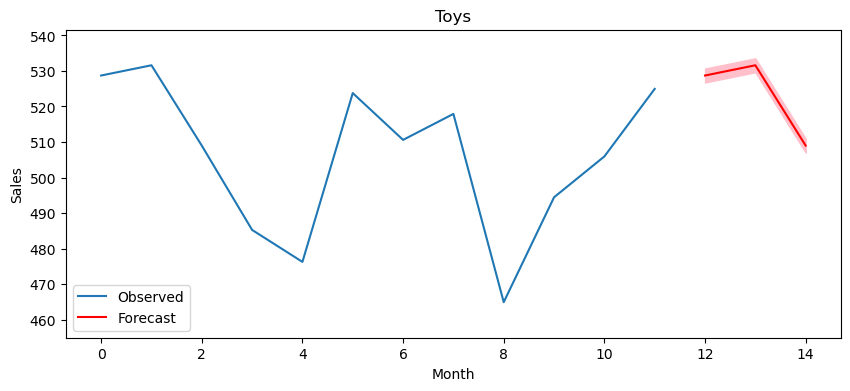

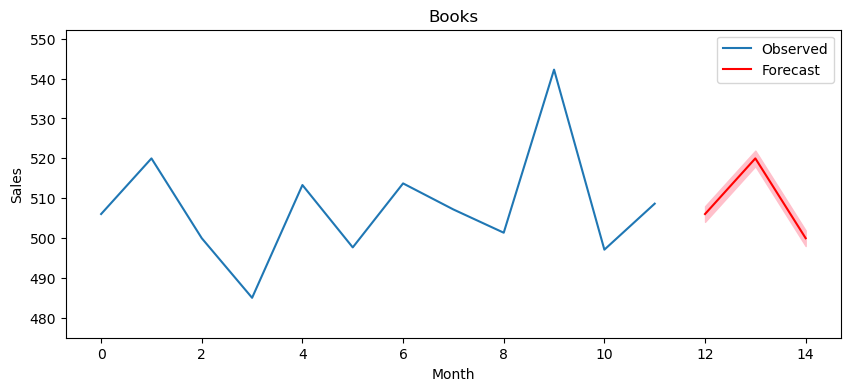

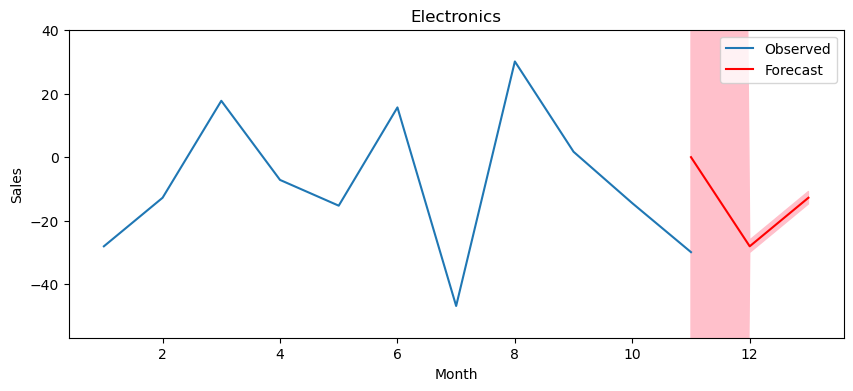

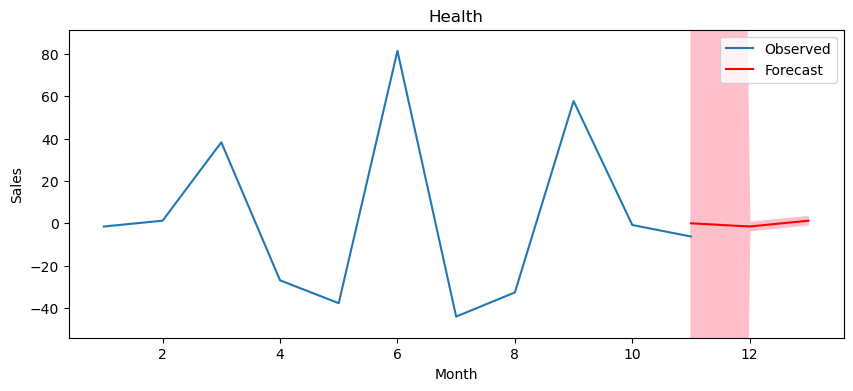

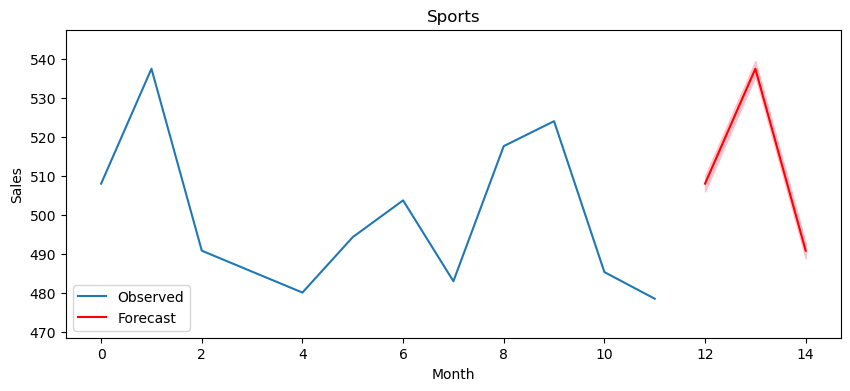

In [138]:
period = 3
for i in data.keys():
    global sarima, sales_value

    if s[s.category == i]['stationary_check'].values[0] == 'Stationary':
        sales_value = data[i]['sales']
        sarima = SARIMAX(data[i]['sales'], order=(2,0,2), seasonal_order=(0,1,1,12)) 
    else:
        sales_value = data[i]['diff']
        sarima = SARIMAX(data[i]['diff'], order=(2,0,2), seasonal_order=(0,1,1,12))
    
    result = sarima.fit(disp=False)
    forecast = result.get_forecast(steps=period)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # observed = sales_value[-period:] 
    # mae = mean_absolute_error(observed, forecast_mean) 
    # mse = mean_squared_error(observed, forecast_mean) 
    # print(f'MAE: {mae}') 
    # print(f'MSE: {mse}')
    
    plt.figure(figsize=(10, 4)) 
    plt.plot(sales_value, label='Observed') 
    plt.plot(forecast_mean, label='Forecast', color='red') 
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink') 
    plt.title(i) 
    plt.xlabel("Month") 
    plt.ylabel("Sales") 
    plt.legend() 
    plt.ylim(sales_value.min()-10 if sales_value.min() < forecast_mean.min() else forecast_mean.min()-10, 
             forecast_mean.max()+10 if forecast_mean.max() > sales_value.max() else sales_value.max()+10)
    plt.show()